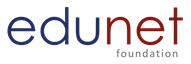

# Edunet Foundation : Self Practice Exercises

## Self Practice 3.1 Classification of handwritten digits using ANN 

#### MNIST dataset 

#### Step 1 : Importing all dependence 

In [67]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

#### Step 2 : Import data and normalize it 

In [68]:
mnist = tf.keras.datasets.mnist 
(x_train,y_train) , (x_test,y_test) = mnist.load_data() 

x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1) 


#### Step 3 : view data 

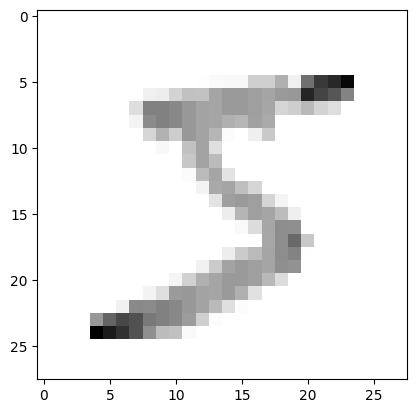

In [69]:
def draw(n): 
    plt.imshow(n,cmap=plt.cm.binary) 
    plt.show()  
      
draw(x_train[0]) 

#### Step 4 : make a neural network and train it 

In [70]:
#there are two types of models 
#sequential is most common, why? 

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) 
#reshape 

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) 

model.compile(optimizer='adam', 
			loss='sparse_categorical_crossentropy', 
			metrics=['accuracy'] 
			) 
model.fit(x_train,y_train,epochs=3) 


Epoch 1/3


1875/1875 [==============================] - 13s 5ms/step - loss: 0.2686 - accuracy: 0.9217
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1099 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0734 - accuracy: 0.9766


In [71]:
val_loss,val_acc = model.evaluate(x_test,y_test) 
print("loss-> ",val_loss,"\nacc-> ",val_acc) 

313/313 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.9721
loss->  0.09025983512401581 
acc->  0.972100019454956


313/313 [==============================] - 1s 3ms/step
label ->  1
prediction ->  1


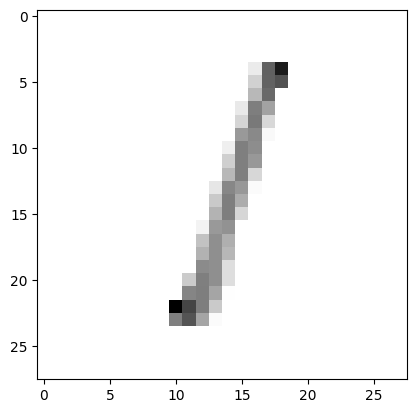

In [72]:
predictions=model.predict([x_test]) 
print('label -> ',y_test[2]) 
print('prediction -> ',np.argmax(predictions[2])) 

draw(x_test[2]) 


In [73]:
#saving the model 
# .h5 or .model can be used 

model.save('epic_num_reader.h5') 


C:\Users\PRS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
